### Categorical / Nominal Variables

In [1]:
%%capture
%run '../lib/libraries.ipynb'
from ..lib import utilities as util
import pandas as pd

In [2]:
filterDf  = util.load_df('filterDf')
descDf = util.load_df('descDf')
types = util.get_var_types()

#### Variable List

In [3]:
util.variable_types(descDf, 'Categorical Nominal')

,category,variable
0,Assignment (a),ced_assignment_type_code
1,Assignment Attempt (aa),learner_attempt_status
2,Item (i),item_type_code_name
3,Item (i),scoring_type_code
4,Item Attempt (ia),assigned_item_status
5,Item Attempt (ia),response_correctness


#### Statistics

In [4]:
# Categorical / Nominal Values
for f in types['nominalVars']:
    util.count_values(filterDf, f).show(50, False)


+--------------------+-----+
|assigned_item_status|count|
+--------------------+-----+
|scored              |64804|
|responded           |34   |
+--------------------+-----+

+------------------------+-----+
|ced_assignment_type_code|count|
+------------------------+-----+
|assessment              |61463|
|practice                |1595 |
|game                    |1555 |
|clo                     |214  |
|rubric                  |11   |
+------------------------+-----+

+----------------------+-----+
|item_type_code_name   |count|
+----------------------+-----+
|multipleChoice        |26704|
|fillInTheBlank        |10497|
|equationEntry         |7841 |
|trueFalse             |4561 |
|cloze                 |3024 |
|multipleSelect        |2295 |
|graphing              |2076 |
|MultipleChoiceResponse|1550 |
|choiceMatrix          |1203 |
|matching              |924  |
|shortAnswer           |853  |
|selectText            |813  |
|bucketing             |799  |
|sortable              |549  |


Null Values
- response_correctness
  - 34 null values
    - investigate further
  - 1566 "[unassigned]"
    - investigate further for relation to the 1566 assignment_attempt_number and assignment_max_attempts values
  - Could be null because the question wasn't answered or a different method of scoring the question
- scoring_type_code
  - 1600 "[unassigned]"

Large number of categorical values
- item_type_code_name
  - Need to transform by reclassifying to reduce number of levels

learner_attempt_status
- Unary "fully scored"
- Will not be used

In [5]:
# Create Todo list
util.add_todo('Investigate null values in response_correctness')
util.add_todo('Investigate [unassigned] in response_correctness')
util.add_todo('Investigate [unassigned] in scoring_type_code')
util.add_todo('Reduce number of levels in item_type_code_name')

Todo: Investigate null values in response_correctness
Todo: Investigate [unassigned] in response_correctness
Todo: Investigate [unassigned] in scoring_type_code_name
Todo: Reduce number of levels in item_type_code_name
Todo: Remove unary learner_attempt_status = "fully scored"


###### Correlations Heatmap

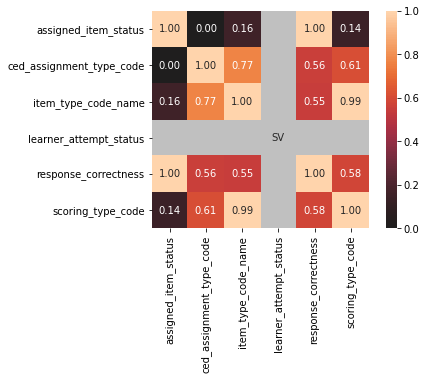

In [6]:
corr, ax = util.associations( filterDf.select(*types['nominalVars']).toPandas(), nan_replace_value='null' )

- High correlation
  - item_type_code_name and scoring_type_code
  - assigned_item_status and response_correctness
- learner_attempt_status a single value ('fully scored)

###### Display item_type_code_name and scoring_type_code Correlation

In [7]:
dfPd = filterDf.select('item_type_code_name','scoring_type_code').toPandas()
pd.crosstab(dfPd.item_type_code_name.fillna('null'), dfPd.scoring_type_code.fillna('null'), margins=True, margins_name="Total")

scoring_type_code,[unassigned],automatic,external,manual,Total
item_type_code_name,,,,,
FillinBlankResponse,5,0,0,0,5
MultipleChoiceResponse,1550,0,0,0,1550
RubricResponse,11,0,0,0,11
aheAlgo,0,0,219,0,219
bucketing,0,799,0,0,799
choiceMatrix,0,1203,0,0,1203
cloze,0,3024,0,0,3024
equationEntry,0,7841,0,0,7841
essay,9,0,0,522,531


- item_type_code_name indicates the scoring_type_code
  - Consider correlation when reducing number of levels in item_type_code_name

###### Display assigned_item_status and response_correctness Correlation

In [8]:
dfPd = filterDf.select('assigned_item_status','response_correctness').toPandas()
pd.crosstab(dfPd.assigned_item_status.fillna('null'), dfPd.response_correctness.fillna('null'), margins=True, margins_name="Total")

response_correctness,[unassigned],correct,incorrect,null,partially_correct,Total
assigned_item_status,,,,,,
responded,0,0,0,34,0,34
scored,1566,43711,18103,0,1424,64804
Total,1566,43711,18103,34,1424,64838


- assigned_item_status = responded when response_correctness = null